C:\Users\student\anaconda3\envs\computer_vision_lab\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.5 when it was built against 1.14.6, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predicted Label: n04597913
Description: wooden_spoon
Confidence Score: 17.04%


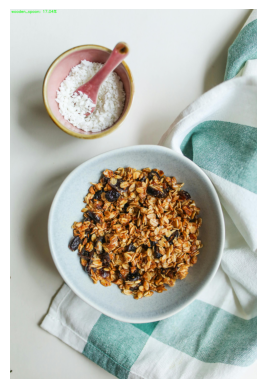

In [9]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Load the pre-trained MobileNetV2 model from TensorFlow Keras
model = MobileNetV2(weights='imagenet')

# Load the image using OpenCV
img = cv2.imread(r"C:\Users\student\Desktop\40.jpg")

# Convert the image to RGB (OpenCV loads images in BGR by default)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resize the image to 224x224 pixels, as expected by MobileNetV2
img_resized = cv2.resize(img_rgb, (224, 224))

# Preprocess the image (this is specific to the MobileNetV2 model)
img_preprocessed = np.expand_dims(img_resized, axis=0)  # Add batch dimension
img_preprocessed = preprocess_input(img_preprocessed)

# Make predictions using the model
predictions = model.predict(img_preprocessed)

# Decode the predictions into readable class labels
decoded_predictions = decode_predictions(predictions, top=1)[0]
predicted_label, predicted_description, predicted_score = decoded_predictions[0]

# Display the result
print(f"Predicted Label: {predicted_label}")
print(f"Description: {predicted_description}")
print(f"Confidence Score: {predicted_score * 100:.2f}%")

# Display the image with the prediction label
cv2.putText(img, f"{predicted_description}: {predicted_score * 100:.2f}%", 
            (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Convert BGR image to RGB for displaying using matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot using matplotlib
import matplotlib.pyplot as plt
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


In [8]:
!pip install tensorflow


  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
   ---------------------------------------- 0.0/375.9 MB ? eta -:--:--
   ---------------------------------------- 3.9/375.9 MB 19.6 MB/s eta 0:00:19
   - -------------------------------------- 10.2/375.9 MB 24.5 MB/s eta 0:00:15
   - -------------------------------------- 16.3/375.9 MB 25.6 MB/s eta 0:00:15
   -- ------------------------------------- 25.7/375.9 MB 30.1 MB/s eta 0:00:12
   --- ------------------------------------ 35.9/375.9 MB 34.1 MB/s eta 0:00:10
   ---- ----------------------------------- 45.4/375.9 MB 35.6 MB/s eta 0:00:10
   ------ --------------------------------- 56.6/375.9 MB 38.4 MB/s eta 0:00:09
   ------- -------------------------------- 66.3/375.9 MB 39.2 MB/s eta 0:00:08
   -------- ------------------------------- 75.8/375.9 MB 39.6 MB/s eta 0:00:08
   --------- ------------------------------ 84.9/375.9 MB 40.1 MB/s eta 0:00:08
   ---------- ----------------------------- 96.5/375.9 MB 41.6 MB

In [11]:
!pip install scikit-learn


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------  11.0/11.1 MB 57.2 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 40.9 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
   --------- ------------------------------ 10.2/41.2 MB 45.5 MB/s eta 0:00:01
   --------------------- ------------------ 21.8/41.2 MB 50.9 MB/s eta 0:00:01
   -------------------------------- ------- 33.8/41.2 MB 53.7 MB/s eta 0:00:01
   ---------------------------------------  41.2/41.2 MB 53.4 MB/s eta 0:00:01
   ---------------------------------------- 41.2/41.2 MB 46.8 MB/s eta 0:00:00


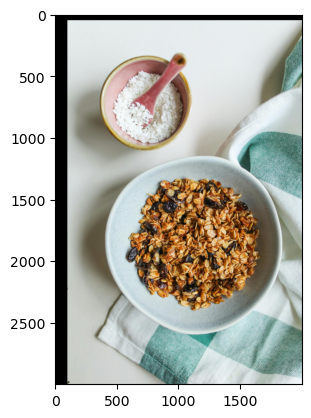

In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread(r"C:\Users\student\Desktop\40.jpg")

img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

height, width, channel = img.shape

Tx,Ty =100,50

new_img = np.zeros_like(img)

for y in range(height):
    for x in range(width):

        new_x = x+Tx
        new_y = y+Ty

        if 0 <= new_x < width and 0 <= new_y < height :
            new_img[new_y,new_x] = img_rgb[y,x]

plt.imshow(new_img)

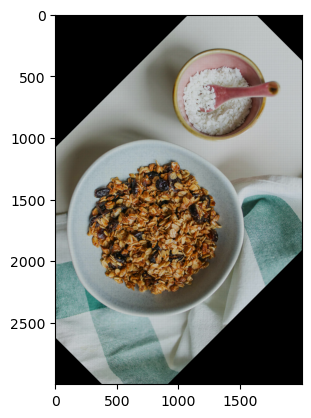

In [19]:
import cv2
import math
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread(r"C:\Users\student\Desktop\40.jpg")

img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

height, width, channel = img.shape

angle = 45
theta = math.radians(angle)

sin_theta =math.sin(theta)
cos_theta =math.cos(theta)

new_img = np.zeros_like(img)

center_x, center_y = width // 2, height // 2


for y in range(height):
    for x in range(width):

        x_shifted = x - center_x
        y_shifted = y - center_y

        new_x = int(cos_theta*x_shifted - sin_theta*y_shifted + center_x)
        new_y = int(sin_theta*x_shifted + cos_theta*y_shifted + center_y)

        if 0 <= new_x < width and 0 <= new_y < height :
            new_img[new_y,new_x] = img_rgb[y,x]

plt.imshow(new_img)

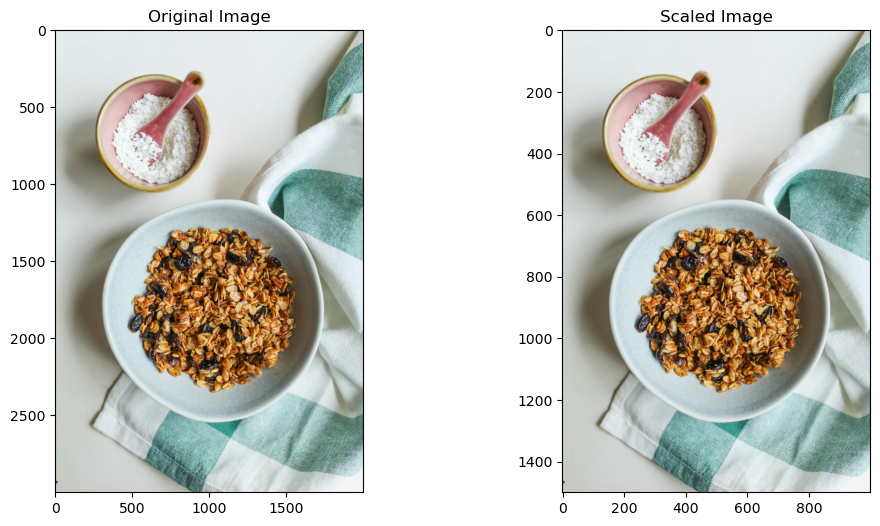

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(r"C:\Users\student\Desktop\40.jpg")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

height, width, channels = img_rgb.shape

scale_factor = 0.5 

new_width = int(width * scale_factor)
new_height = int(height * scale_factor)

new_img = np.zeros((new_height, new_width, channels), dtype=np.uint8)

for y in range(new_height):
    for x in range(new_width):
       
        orig_x = int(x / scale_factor)
        orig_y = int(y / scale_factor)
        
        new_img[y, x] = img_rgb[orig_y, orig_x]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(new_img)
plt.title('Scaled Image')

plt.show()


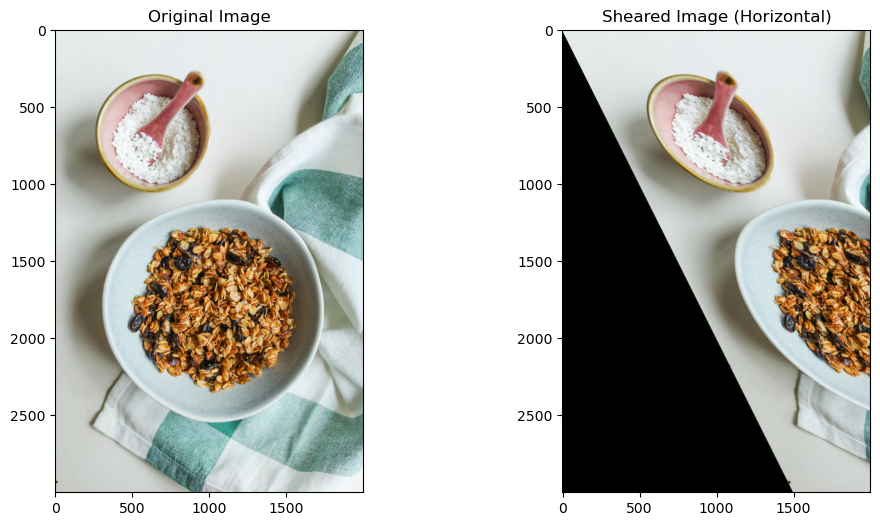

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread(r"C:\Users\student\Desktop\40.jpg")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

height, width, channels = img_rgb.shape

Sx = 0.5 
Sy = 0.3

sheared_img = np.zeros_like(img_rgb)

for y in range(height):
    for x in range(width):
        new_x = int(x + Sx * y)
        
        if 0 <= new_x < width:
            sheared_img[y, new_x] = img_rgb[y, x]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis()

plt.subplot(1, 2, 2)
plt.imshow(sheared_img)
plt.title("Sheared Image (Horizontal)")
plt.axis()

plt.show()



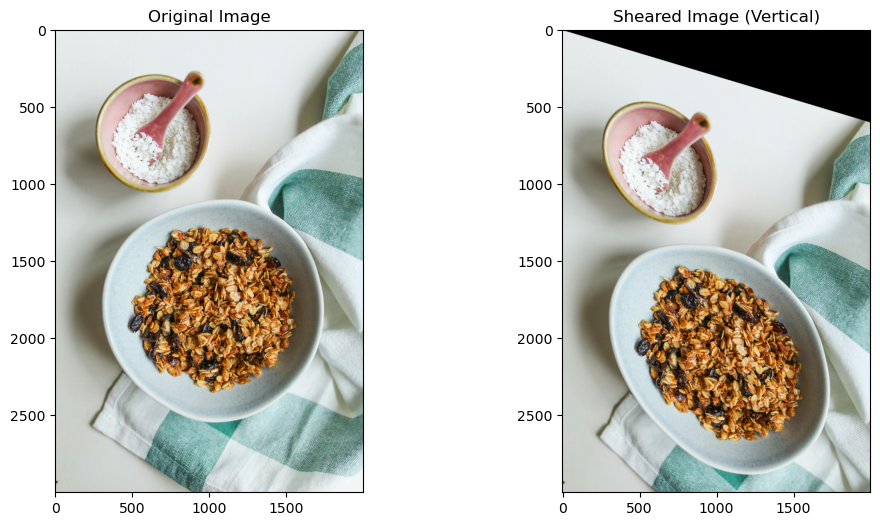

In [22]:
sheared_img_vertical = np.zeros_like(img_rgb)

for y in range(height):
    for x in range(width):
        new_y = int(y + Sy * x)
        
        if 0 <= new_y < height:
            sheared_img_vertical[new_y, x] = img_rgb[y, x]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis()

plt.subplot(1, 2, 2)
plt.imshow(sheared_img_vertical)
plt.title("Sheared Image (Vertical)")
plt.axis()

plt.show()


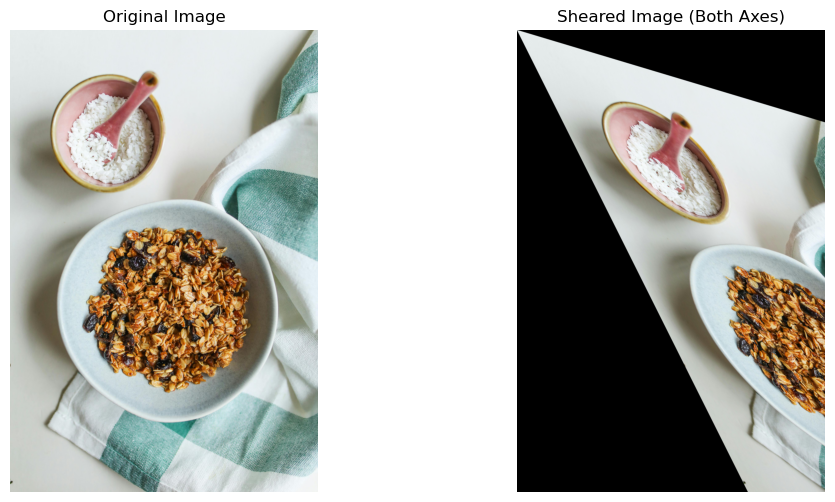

In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(r"C:\Users\student\Desktop\40.jpg")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

height, width, channels = img_rgb.shape

Sx = 0.5  
Sy = 0.3  

sheared_img = np.zeros_like(img_rgb)

for y in range(height):
    for x in range(width):
        new_x = int(x + Sx * y)  
        new_y = int(y + Sy * x)  
        
        if 0 <= new_x < width and 0 <= new_y < height:
            sheared_img[new_y, new_x] = img_rgb[y, x]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sheared_img)
plt.title("Sheared Image (Both Axes)")
plt.axis('off')

plt.show()


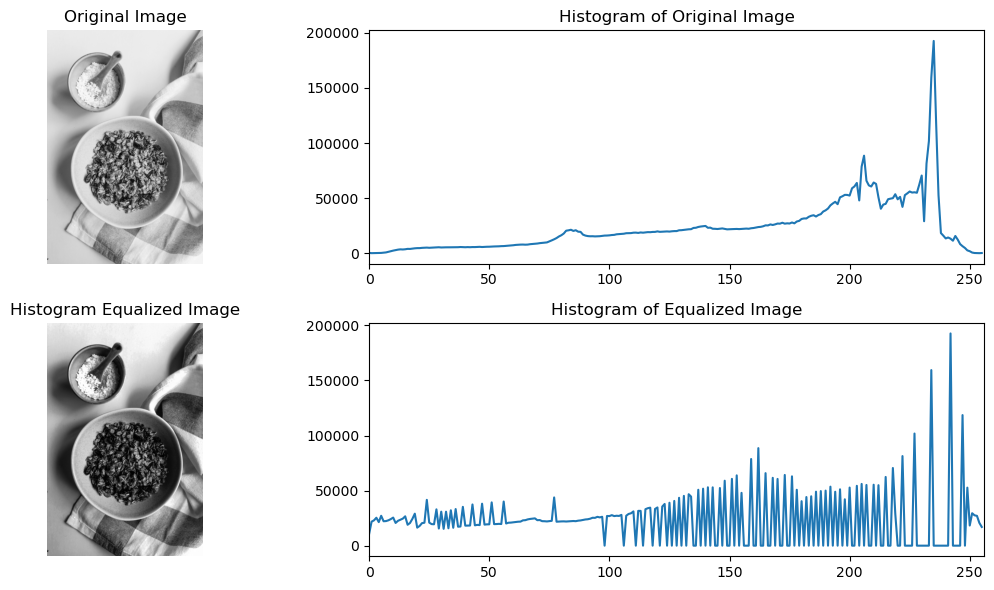

In [42]:
import cv2
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread(r"C:\Users\student\Desktop\40.jpg"
, cv2.IMREAD_GRAYSCALE)

# Apply Histogram Equalization
equalized = cv2.equalizeHist(image)

# Calculate histograms for original and equalized images
hist_original = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([equalized], [0], None, [256], [0, 256])

# Display original and equalized images along with their histograms
plt.figure(figsize=(12, 6))

# Original Image and Histogram
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Histogram of Original Image')
plt.plot(hist_original)
plt.xlim([0, 256])

# Equalized Image and Histogram
plt.subplot(2, 2, 3)
plt.title('Histogram Equalized Image')
plt.imshow(equalized, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Histogram of Equalized Image')
plt.plot(hist_equalized)
plt.xlim([0, 256])

plt.tight_layout()
plt.show()


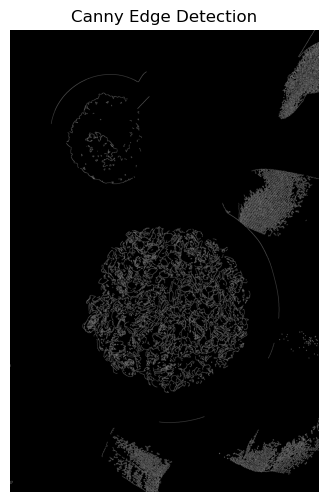

In [36]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Load the image
img = cv2.imread(r"C:\Users\student\Desktop\40.jpg", cv2.IMREAD_GRAYSCALE)  # Load in grayscale

# Step 2: Apply Gaussian blur (optional but recommended to reduce noise)
blurred = cv2.GaussianBlur(img, (5, 5), 0)

# Step 3: Apply Canny edge detection
edges = cv2.Canny(blurred, threshold1=100, threshold2=200)

# Step 4: Display the result using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()


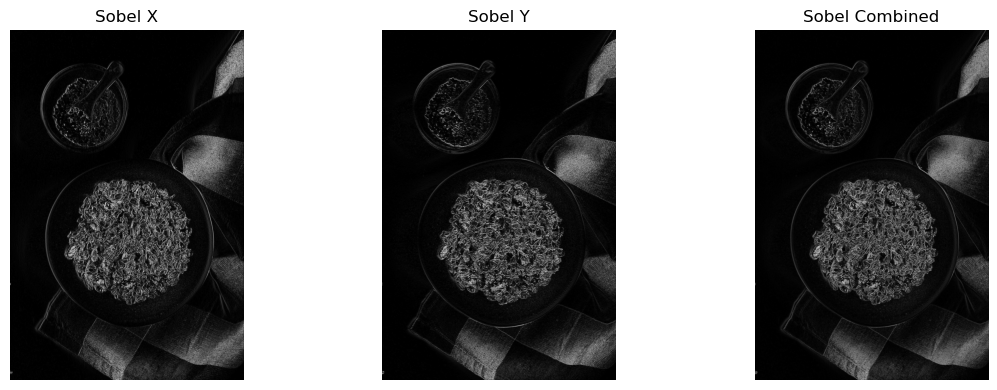

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv2.imread(r"C:\Users\student\Desktop\40.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Sobel operator in X and Y directions
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edges
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Vertical edges

# Convert back to uint8
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)

# Combine both directions
sobel_combined = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

# Plot results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Combined')
plt.axis('off')

plt.tight_layout()
plt.show()


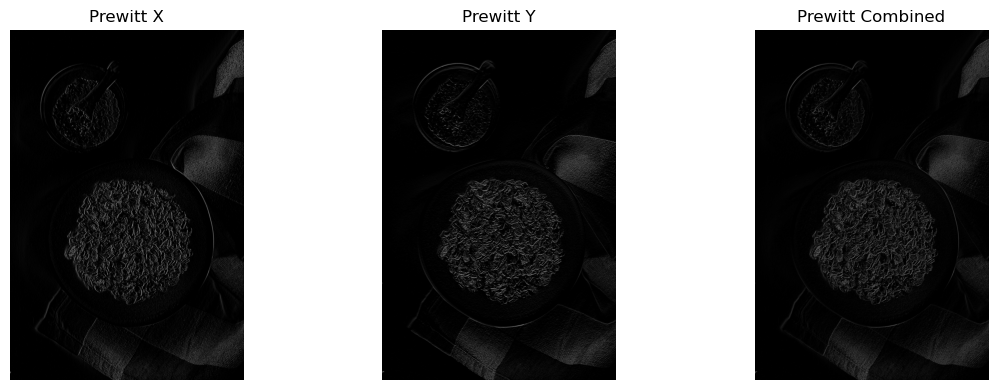

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv2.imread(r"C:\Users\student\Desktop\40.jpg", cv2.IMREAD_GRAYSCALE)

# Define Prewitt kernels
kernelx = np.array([[1, 0, -1], 
                    [1, 0, -1], 
                    [1, 0, -1]])

kernely = np.array([[1,  1,  1], 
                    [0,  0,  0], 
                    [-1, -1, -1]])

# Apply the kernels using cv2.filter2D
prewitt_x = cv2.filter2D(img, -1, kernelx)
prewitt_y = cv2.filter2D(img, -1, kernely)

# Combine both directions
prewitt_combined = cv2.addWeighted(prewitt_x, 0.5, prewitt_y, 0.5, 0)

# Plot the results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(prewitt_x, cmap='gray')
plt.title('Prewitt X')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(prewitt_y, cmap='gray')
plt.title('Prewitt Y')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(prewitt_combined, cmap='gray')
plt.title('Prewitt Combined')
plt.axis('off')

plt.tight_layout()
plt.show()


In [25]:
import cv2
import numpy as np
import os
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Function to extract HOG features from an image
def extract_hog_features(image, size=(64, 128)):
    """
    Extract HOG features from an image, resizing it to a fixed size to reduce memory consumption.
    """
    resized_image = cv2.resize(image, size)  # Resize image to a fixed size
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    hog = cv2.HOGDescriptor()  # HOG descriptor
    features = hog.compute(gray)  # Extract HOG features
    return features.flatten()  # Flatten the array to a 1D vector

# Directory containing the dataset (replace with your dataset path)
dataset_path = r"C:\Users\student\Downloads\archive (13)"

# Initialize lists to store features and labels
features_list = []
labels_list = []

# Loop over all classes (subfolders) in the dataset
for class_label in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_label)
    
    if os.path.isdir(class_path):  # Check if it's a directory
        # Loop over all images in the current class folder
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            
            if image_path.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check if it's an image file
                img = cv2.imread(image_path)
                
                if img is not None:
                    # Extract HOG features and append them along with the label
                    features = extract_hog_features(img)
                    features_list.append(features)
                    labels_list.append(class_label)

# Convert labels to numeric values
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels_list)

# Convert features and labels to numpy arrays
X = np.array(features_list)
y = np.array(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model using the HOG features
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# Predict the class for the test set
predictions = clf.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, predictions, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

  bath_towel       0.93      0.99      0.96       156
        bowl       0.99      0.94      0.97       200

    accuracy                           0.96       356
   macro avg       0.96      0.97      0.96       356
weighted avg       0.97      0.96      0.96       356



In [26]:
import joblib
joblib.dump(clf, 'svm_model.pkl')


['svm_model.pkl']

Predicted label: 1
Predicted class name: bowl


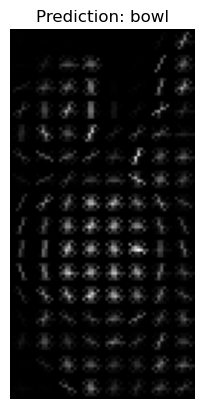

In [33]:
import cv2
import numpy as np
from skimage.feature import hog
import joblib
import matplotlib.pyplot as plt

# Step 1: Load trained model
clf = joblib.load('svm_model.pkl')  # replace with your actual model path

# Step 2: Define class label names
class_names = {0: "bath_towel", 1: "bowl"}  # Modify based on your dataset

# Step 3: Load and preprocess sample image
sample_image = cv2.imread(r"C:\Users\student\Desktop\40.jpg")

gray_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2GRAY)
resized_image = cv2.resize(gray_image, (64, 128))  # Match training size

# Step 4: Extract HOG features
fd, hog_image = hog(resized_image, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True)

fd = np.reshape(fd, (1, -1))

# Step 5: Predict class
prediction = clf.predict(fd)
predicted_class = prediction[0]

# Step 6: Display result
print("Predicted label:", predicted_class)
print("Predicted class name:", class_names[predicted_class])

# Optional: Visualize HOG
plt.imshow(hog_image, cmap='gray')
plt.title(f'Prediction: {class_names[predicted_class]}')
plt.axis('off')
plt.show()


In [28]:
!pip install scikit-image


  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   -------------------------------- ------- 10.5/12.8 MB 54.4 MB/s eta 0:00:01
   ---------------------------------------- 12.8/12.8 MB 42.2 MB/s eta 0:00:00
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)


In [35]:
import cv2
import numpy as np
import os
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Set the dataset path (each subfolder is a class)
dataset_path = r"C:\Users\student\Downloads\archive (13)" # Update this path
class_names = os.listdir(dataset_path)

features = []
labels = []

# Step 1: Read images and extract histogram features
for label_idx, class_folder in enumerate(class_names):
    folder_path = os.path.join(dataset_path, class_folder)
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is None:
                continue

            hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
            hist = cv2.calcHist([hsv], [0, 1, 2], None, [8, 8, 8],
                                [0, 256, 0, 256, 0, 256])
            hist = cv2.normalize(hist, hist).flatten()

            features.append(hist)
            labels.append(label_idx)

# Step 2: Train/test split
features = np.array(features)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Step 3: Train the SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Step 4: Predict and evaluate
predictions = svm.predict(X_test)

# Optional: Label mapping back to class names
print("Class Labels Mapping:")
for idx, name in enumerate(class_names):
    print(f"{idx}: {name}")

print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=class_names))


Class Labels Mapping:
0: bath_towel
1: bowl

Classification Report:
              precision    recall  f1-score   support

  bath_towel       0.75      0.74      0.74       156
        bowl       0.80      0.81      0.80       200

    accuracy                           0.78       356
   macro avg       0.77      0.77      0.77       356
weighted avg       0.77      0.78      0.78       356




Predicted class for test image: bath_towel


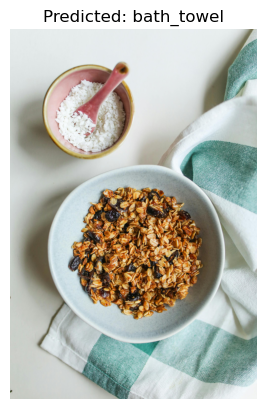

In [37]:
# === TESTING A SAMPLE IMAGE ===

# Load the sample image
sample_image_path = r"C:\Users\student\Desktop\40.jpg"  # <-- Change this to your test image path
sample_img = cv2.imread(sample_image_path)

if sample_img is not None:
    # Convert to HSV and extract histogram features
    hsv = cv2.cvtColor(sample_img, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, [8, 8, 8],
                        [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()

    # Reshape and predict
    hist = hist.reshape(1, -1)
    prediction = svm.predict(hist)
    predicted_class = class_names[prediction[0]]

    print(f"\nPredicted class for test image: {predicted_class}")

    # Optionally display the image with predicted label
    import matplotlib.pyplot as plt
    sample_img_rgb = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
    plt.imshow(sample_img_rgb)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

else:
    print("Failed to load sample image.")
